In [1]:
import fluidsf
import h5py
import numpy as np

In [2]:
%%time
pathname = '../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/'
filename = 'SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_30040.mat'

f = h5py.File(pathname + filename, "r")

x = np.linspace(-f['Lx'][0]/2, f['Lx'][0]/2, f['nx'][0])
y = np.linspace(-f['Ly'][0]/2, f['Ly'][0]/2, f['ny'][0])

CPU times: user 2.52 ms, sys: 4.87 ms, total: 7.38 ms
Wall time: 11.6 ms


In [3]:
from glob import glob, iglob

pathname = '../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/'

snapshot_no = 0
snapshot_names= list()

for snapshot in iglob(pathname +"SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_*.mat"):
    snapshot_names.append(snapshot)
    print(snapshot_names[snapshot_no], snapshot_no)
    snapshot_no += 1

../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_20993.mat 0
../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_23492.mat 1
../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_8497.mat 2
../simulations/output/copied_data/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5/SurfaceQG_n_512_visc_1.0e-17_order_8_hypovisc_0.005_order_-2_kf_7.0_F_1.0e-5_endtime_30000.0_beta_0.5_7997.mat 3
..

In [4]:
%%time
import warnings; warnings.simplefilter('ignore')

len(snapshot_names)

# Initialize an empty dictionary to store sfs
sfs_dict = {}

# Save sf_maps for each snapshot
for snapshot_name in snapshot_names:
    print("Starting snapshot:", snapshot_name[-10:-4])
    f = h5py.File(snapshot_name, "r")
    #sfs = fluidsf.generate_sf_maps_2d(np.array(f['u']), np.array(f['v']), x, y,  sf_type=["ASF_V"])
    sfs = fluidsf.generate_sf_maps_2d(np.array(f['u']), np.array(f['v']), x, y, 
                                              scalar=np.array(f['b']), 
                                              sf_type=["ASF_V","ASF_S","LLL","TTT","LTT","LSS"])
    # Append sfs to the dictionary
    sfs_dict[snapshot_name] = sfs
    print("Completed snapshot:", snapshot_name[-10:-4])

Starting snapshot: _20993
Completed snapshot: _20993
Starting snapshot: _23492
Completed snapshot: _23492
Starting snapshot: 5_8497
Completed snapshot: 5_8497
Starting snapshot: 5_7997
Completed snapshot: 5_7997
Starting snapshot: _17494
Completed snapshot: _17494
Starting snapshot: _18994
Completed snapshot: _18994
Starting snapshot: 5_2999
Completed snapshot: 5_2999
Starting snapshot: _14995
Completed snapshot: _14995
Starting snapshot: .5_500
Completed snapshot: .5_500
Starting snapshot: _19494
Completed snapshot: _19494
Starting snapshot: 5_3499
Completed snapshot: 5_3499
Starting snapshot: _16995
Completed snapshot: _16995
Starting snapshot: _15495
Completed snapshot: _15495
Starting snapshot: _22993
Completed snapshot: _22993
Starting snapshot: 5_1500
Completed snapshot: 5_1500
Starting snapshot: _21493
Completed snapshot: _21493
Starting snapshot: 5_9997
Completed snapshot: 5_9997
Starting snapshot: _26991
Completed snapshot: _26991
Starting snapshot: 5_4998
Completed snapshot: 

In [5]:
# Calculate the statistics of sfs across all snapshots
mean_sfs = {}
median_sfs = {}
quantiles_sfs = {}
for snapshot_name, sfs in sfs_dict.items():
    for key, value in sfs.items():
        if key not in mean_sfs and value is not None:
            mean_sfs[key] = value.copy() # Use copy to avoid overwriting sfs_dict
            median_sfs[key] = [value]
            quantiles_sfs[key] = [value]
            if key is 'SF_advection_velocity_xy':
                print(value[0,0], key, snapshot_name[-10:-4])
        elif value is not None:
            mean_sfs[key] += value
            median_sfs[key].append(value)
            quantiles_sfs[key].append(value)
            if key is 'SF_advection_velocity_xy':
                print(value[0,0], key, snapshot_name[-10:-4])
                
# Divide the accumulated values by the number of snapshots
num_snapshots = len(sfs_dict)
for key in mean_sfs:
    mean_sfs[key] /= num_snapshots
    
for key in median_sfs:
    stacked_values = np.stack(median_sfs[key])
    median_sfs[key] = np.median(stacked_values, axis=0)
    quantiles_sfs[key] = {
        '25th': np.percentile(stacked_values, 25, axis=0),
        '50th': np.percentile(stacked_values, 50, axis=0),
        '75th': np.percentile(stacked_values, 75, axis=0)
    }

0.00029740017537544395 SF_advection_velocity_xy _20993
2.8780506724920496e-05 SF_advection_velocity_xy _23492
-1.3527069554629369e-05 SF_advection_velocity_xy 5_8497
9.779798950336625e-06 SF_advection_velocity_xy 5_7997
1.0851187843375523e-05 SF_advection_velocity_xy _17494
8.138585560553676e-06 SF_advection_velocity_xy _18994
3.9236838411972716e-05 SF_advection_velocity_xy 5_2999
-1.9347742065683335e-05 SF_advection_velocity_xy _14995
-5.8174890824056356e-05 SF_advection_velocity_xy .5_500
-1.2604491731984982e-05 SF_advection_velocity_xy _19494
4.8869865679081197e-05 SF_advection_velocity_xy 5_3499
4.531345494456083e-05 SF_advection_velocity_xy _16995
-0.00016399936475762887 SF_advection_velocity_xy _15495
5.544810576695811e-06 SF_advection_velocity_xy _22993
5.188082774656832e-05 SF_advection_velocity_xy 5_1500
9.151321677973559e-05 SF_advection_velocity_xy _21493
5.290386958610331e-05 SF_advection_velocity_xy 5_9997
0.00010739449079699732 SF_advection_velocity_xy _26991
9.3152170254

In [6]:
import pickle 

with open('mean_sf_2d_maps.pkl', 'wb') as f:
    pickle.dump(mean_sfs, f)
        
with open('mean_sf_2d_maps.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
with open('snapshots_sf_2d_maps.pkl', 'wb') as f:
    pickle.dump(sfs_dict, f)
        
with open('snapshots_sf_2d_maps.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
with open('quartiles_sf_2d_maps.pkl', 'wb') as f:
    pickle.dump(quantiles_sfs, f)
        
with open('quartiles_sf_2d_maps.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [7]:
# First we construct these polar map arrays by appending these quadrants to the two already calculated

SQG_map_x_separations = np.append(-np.flip(mean_sfs['x_separations']), mean_sfs['x_separations'], axis=0)
SQG_map_y_separations = np.append(-np.flip(mean_sfs['y_separations']), mean_sfs['y_separations'], axis=0)
SQG_map_advective_SF = np.append(np.flip(mean_sfs['SF_advection_velocity_xy']), 
                                   mean_sfs['SF_advection_velocity_xy'], axis=0)
SQG_map_advective_SF_snapshot0 = np.append(np.flip(sfs_dict[snapshot_names[0]]['SF_advection_velocity_xy']), 
                                   sfs_dict[snapshot_names[0]]['SF_advection_velocity_xy'], axis=0)
SQG_map_advective_SF_snapshot1 = np.append(np.flip(sfs_dict[snapshot_names[1]]['SF_advection_velocity_xy']), 
                                   sfs_dict[snapshot_names[1]]['SF_advection_velocity_xy'], axis=0)

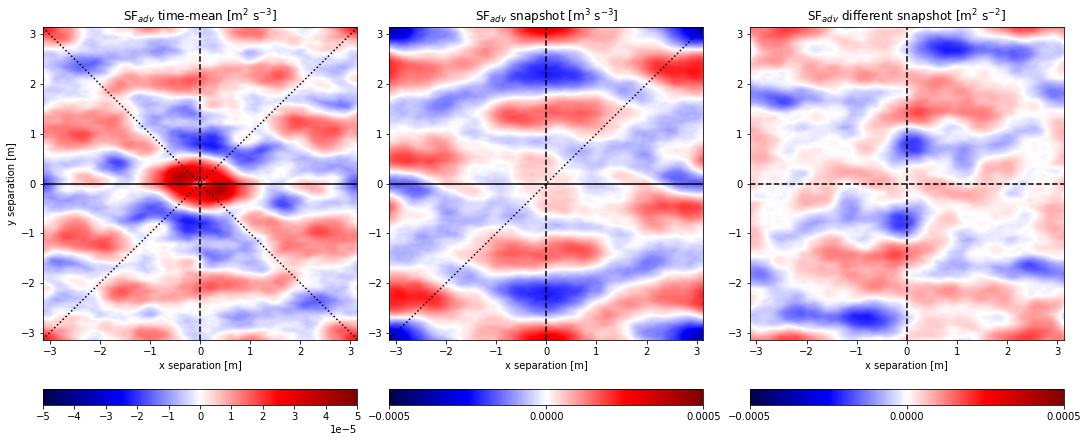

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(15,6), layout='constrained')

cmax_mean = 5e-5
cmax_snapshot = 10*cmax_mean

Advective = axs[0].contourf(SQG_map_x_separations,
            SQG_map_y_separations,
            SQG_map_advective_SF, 
            levels= np.linspace(-cmax_mean, cmax_mean, 1001), 
                            cmap=plt.cm.seismic)
axs[0].set_xlabel('x separation [m]')
axs[0].set_ylabel('y separation [m]')
axs[0].set_title('SF$_{adv}$ time-mean [m$^2$ s$^{-3}$]')

cbar = fig.colorbar(Advective, ax=axs[0], location='bottom')
cbar.set_ticks(np.linspace(-cmax_mean, cmax_mean, 11))
axs[0].axhline(0, color='black', linestyle='-')
axs[0].axvline(0, color='black', linestyle='--')
axs[0].axline([0,0], slope=1, color='black', linestyle=':')
axs[0].axline([0,0], slope=-1, color='black', linestyle=':')

LLL = axs[1].contourf(SQG_map_x_separations,
            SQG_map_y_separations,
            SQG_map_advective_SF_snapshot0, 
            levels= np.linspace(-cmax_snapshot, cmax_snapshot, 1001), 
                            cmap=plt.cm.seismic) #BrBG)
axs[1].set_xlabel('x separation [m]')
axs[1].set_title('SF$_{adv}$ snapshot [m$^3$ s$^{-3}$]')

cbar = fig.colorbar(LLL, ax=axs[1], location='bottom')
cbar.set_ticks([-cmax_snapshot, 0, cmax_snapshot])
axs[1].axhline(0, color='black', linestyle='-')
axs[1].axvline(0, color='black', linestyle='--')
axs[1].axline([0,0], slope=1, color='black', linestyle=':')

LL = axs[2].contourf(SQG_map_x_separations,
            SQG_map_y_separations,
            SQG_map_advective_SF_snapshot1, 
            levels= np.linspace(-cmax_snapshot, cmax_snapshot, 1001),  
                            cmap=plt.cm.seismic) #Reds)
axs[2].set_xlabel('x separation [m]')
axs[2].set_title('SF$_{adv}$ different snapshot [m$^2$ s$^{-2}$]')

cbar = fig.colorbar(LL, ax=axs[2], location='bottom')
cbar.set_ticks([-cmax_snapshot, 0, cmax_snapshot])
axs[2].axhline(0, color='black', linestyle='--')
axs[2].axvline(0, color='black', linestyle='--')

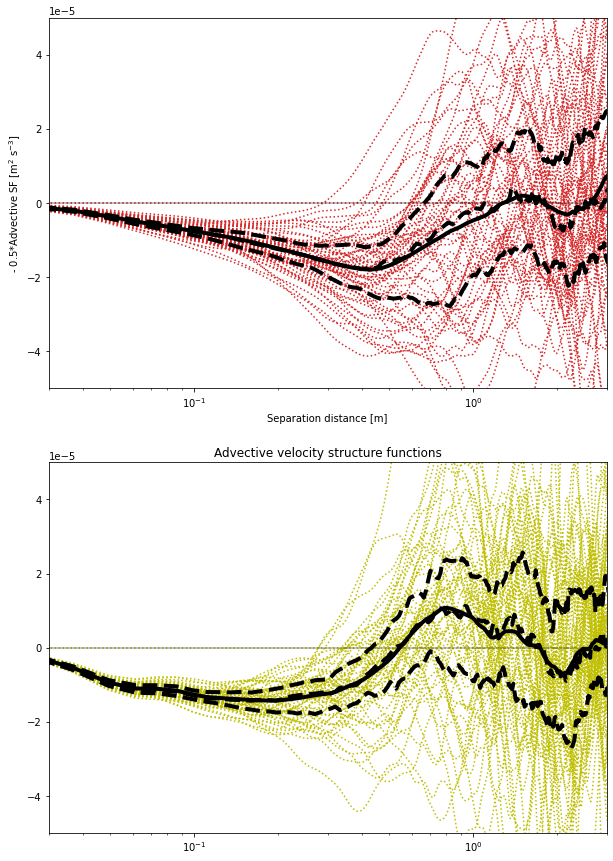

In [9]:
# Contrasting advective structure functions

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 15]

fig, (ax1, ax2) = plt.subplots(2,1)

for snapshot_name in snapshot_names: 
    ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*sfs_dict[snapshot_name]['SF_advection_velocity_xy'][:,256], label=r'Zonal from polar',
             color='tab:red', linestyle='dotted')
    ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*sfs_dict[snapshot_name]['SF_advection_velocity_xy'][0,256:], label=r'Meridional from polar',
             color='y', linestyle='dotted')
    
ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*mean_sfs['SF_advection_velocity_xy'][:,256], label=r'Zonal from polar',
             color='k', linestyle='solid', linewidth=4)
ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*quantiles_sfs['SF_advection_velocity_xy']['25th'][:,256], label=r'Zonal from polar',
             color='k', linestyle='dashed', linewidth=4)
ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*quantiles_sfs['SF_advection_velocity_xy']['50th'][:,256], label=r'Zonal from polar',
             color='k', linestyle='dashed', linewidth=4)
ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*quantiles_sfs['SF_advection_velocity_xy']['75th'][:,256], label=r'Zonal from polar',
             color='k', linestyle='dashed', linewidth=4)
#ax1.semilogx(mean_sfs['x_separations'][:,0], -0.5*median_sfs['SF_advection_velocity_xy'][:,256], label=r'Zonal from polar',
#             color='k', linestyle='dotted', linewidth=4)

ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*mean_sfs['SF_advection_velocity_xy'][0,256:], label=r'Meridional from polar',
             color='k', linestyle='solid', linewidth=4)
ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*quantiles_sfs['SF_advection_velocity_xy']['25th'][0,256:], label=r'Meridional from polar',
             color='k', linestyle='dashed', linewidth=4)
ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*quantiles_sfs['SF_advection_velocity_xy']['50th'][0,256:], label=r'Meridional from polar',
             color='k', linestyle='dashed', linewidth=4)
ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*quantiles_sfs['SF_advection_velocity_xy']['75th'][0,256:], label=r'Meridional from polar',
             color='k', linestyle='dashed', linewidth=4)
#ax2.semilogx(mean_sfs['y_separations'][0,256:], -0.5*median_sfs['SF_advection_velocity_xy'][0,256:], label=r'Meridional from polar',
#             color='k', linestyle='dotted', linewidth=4)


ax1.set_ylabel(r"- 0.5*Advective SF [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax2.set_xlim(3e-2,3e0)
ax1.set_ylim(-5e-5,5e-5)
ax2.set_ylim(-5e-5,5e-5)
#ax1.legend()
ax1.hlines(0,3e-2,3e0,color='k',linestyle='solid',alpha=0.3)
ax2.hlines(0,3e-2,3e0,color='k',linestyle='solid',alpha=0.3)
plt.title('Advective velocity structure functions');